In [450]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [451]:
data = pd.read_csv("HR_Analytics_Kaggle (1).csv")

In [452]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [454]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [455]:
data.shape

(19158, 14)

In [456]:
data.duplicated().sum()

0

In [457]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [458]:
data['gender'].isna().sum()


4508

In [459]:
data['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [460]:
data['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [461]:
data["gender"].mode()[0]

'Male'

In [462]:
data['gender'].fillna(data["gender"].mode()[0], inplace = True)

In [463]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [464]:
data['gender'].isna().sum()


0

In [465]:
data["enrolled_university"].isna()

0        False
1        False
2        False
3         True
4        False
         ...  
19153    False
19154    False
19155    False
19156    False
19157    False
Name: enrolled_university, Length: 19158, dtype: bool

In [466]:
data["enrolled_university"].fillna('False', inplace = True)

In [467]:
data["enrolled_university"].isna().sum()

0

In [468]:
data["education_level"].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [469]:
data.dropna(subset = ['education_level'],inplace = True)

In [470]:
data["education_level"].isna().sum()

0

In [471]:
data["major_discipline"].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [472]:
data.dropna(subset = ["major_discipline"], inplace = True)

In [473]:
data["major_discipline"].isna().sum()

0

In [474]:
data["company_size"].unique

<bound method Series.unique of 0            NaN
1          50-99
2            NaN
3            NaN
4          50-99
          ...   
19150    100-500
19152      10/49
19153        NaN
19154        NaN
19155      50-99
Name: company_size, Length: 16345, dtype: object>

In [475]:
data.dropna(subset = ['company_size'], inplace = True)

In [476]:
data['company_size'].isna().sum()

0

In [477]:
data['company_type'].mode()[0]

'Pvt Ltd'

In [478]:
data['company_type'].fillna(data['company_type'].mode()[0], inplace = True)

In [479]:
data['company_type'].isna().sum()

0

In [480]:
data['last_new_job'].unique()

array(['>4', '4', '1', '3', 'never', '2', nan], dtype=object)

In [481]:
#data = {"last_new_job":['>4', '4', '1', '3', 'never', '2', nan]}

In [482]:
#data['last_new_job '].replace( 'never':0 }, inplace = True)

In [483]:
data['last_new_job'].replace({'never': 0}, inplace=True)

In [484]:
data['last_new_job'] = pd.to_numeric(data['last_new_job'], errors='coerce')

In [485]:
data['last_new_job'].unique()

array([nan,  4.,  1.,  3.,  0.,  2.])

In [486]:
mean = data['last_new_job'].mean()

In [487]:
print(mean)

1.5615851108322878


In [488]:
data["last_new_job"].fillna(mean, inplace = True)

In [489]:
data['last_new_job'].unique()

array([1.56158511, 4.        , 1.        , 3.        , 0.        ,
       2.        ])

In [490]:
data['last_new_job'].isna().sum()

0

In [491]:
data['experience'].unique()

array(['15', '>20', '13', '7', '17', '5', '16', '1', '2', '11', '<1',
       '14', '18', '19', '12', '10', '6', '9', '3', '4', '8', '20', nan],
      dtype=object)

In [492]:
data['experience'] = pd.to_numeric(data['experience'], errors='coerce')

In [493]:
data['experience'].unique()

array([15., nan, 13.,  7., 17.,  5., 16.,  1.,  2., 11., 14., 18., 19.,
       12., 10.,  6.,  9.,  3.,  4.,  8., 20.])

In [494]:
mean1 = data['experience'].mean()

In [495]:
print(mean1)

8.85120282040647


In [496]:
data["experience"].fillna(mean1, inplace = True)

In [497]:
data['experience'].unique()

array([15.        ,  8.85120282, 13.        ,  7.        , 17.        ,
        5.        , 16.        ,  1.        ,  2.        , 11.        ,
       14.        , 18.        , 19.        , 12.        , 10.        ,
        6.        ,  9.        ,  3.        ,  4.        ,  8.        ,
       20.        ])

In [498]:
data['experience'].isna().sum()

0

In [499]:
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

<AxesSubplot:>

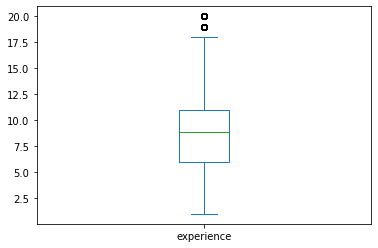

In [501]:
data['experience'].plot(kind= 'box')


<AxesSubplot:ylabel='Frequency'>

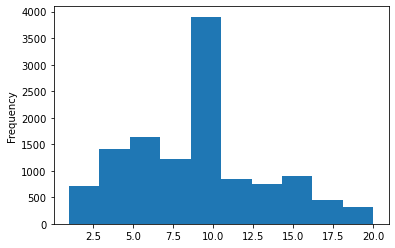

In [510]:
data['experience'].plot(kind = 'hist')


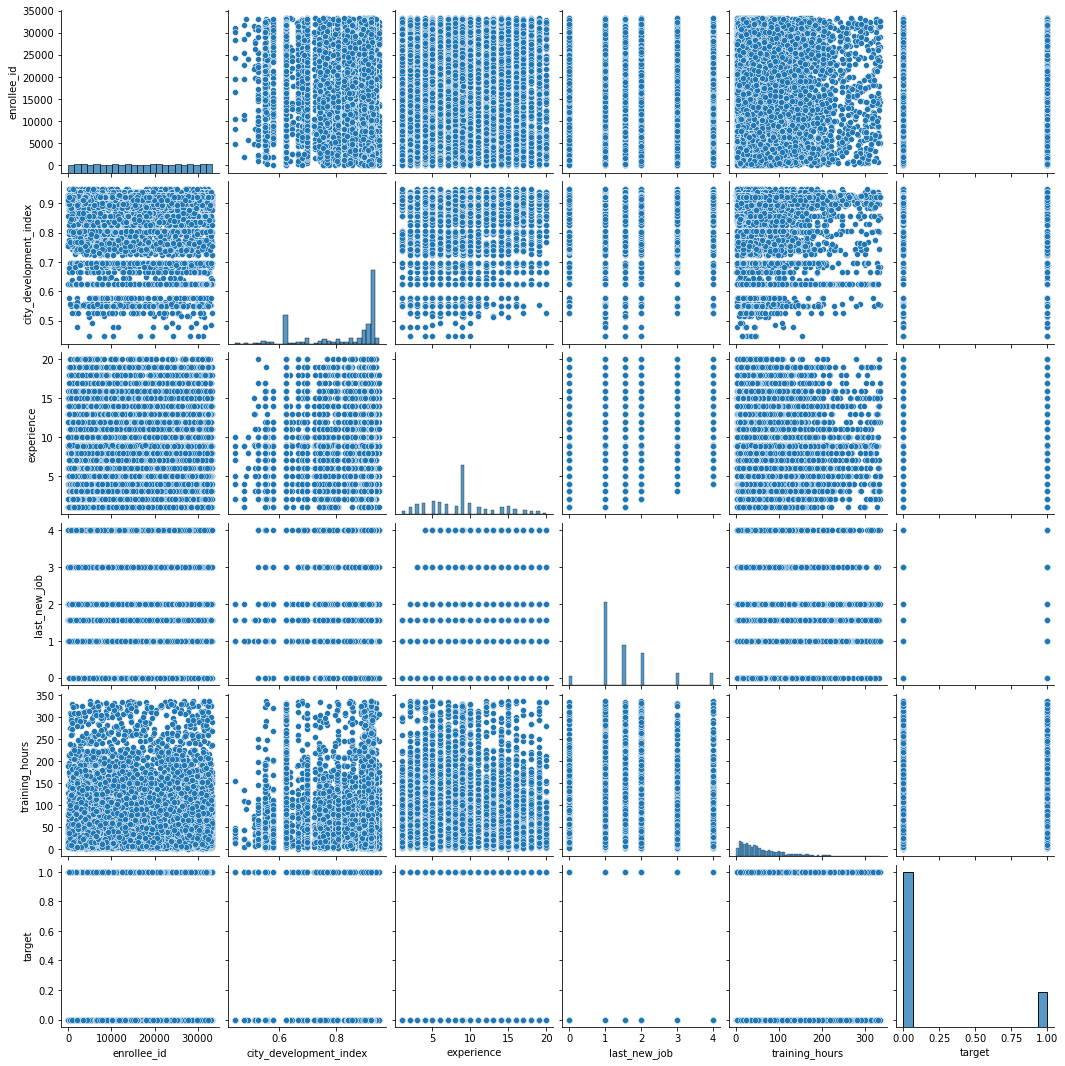

In [512]:
sns.pairplot(data)


<AxesSubplot:xlabel='experience'>

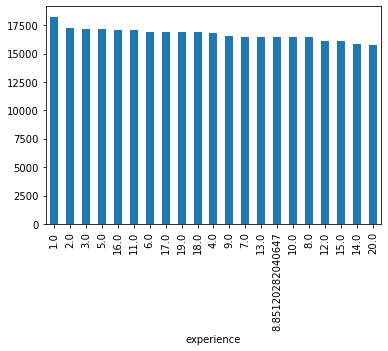

In [518]:
data.groupby('experience')['enrollee_id'].mean().sort_values(ascending = False).plot.bar()

city


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


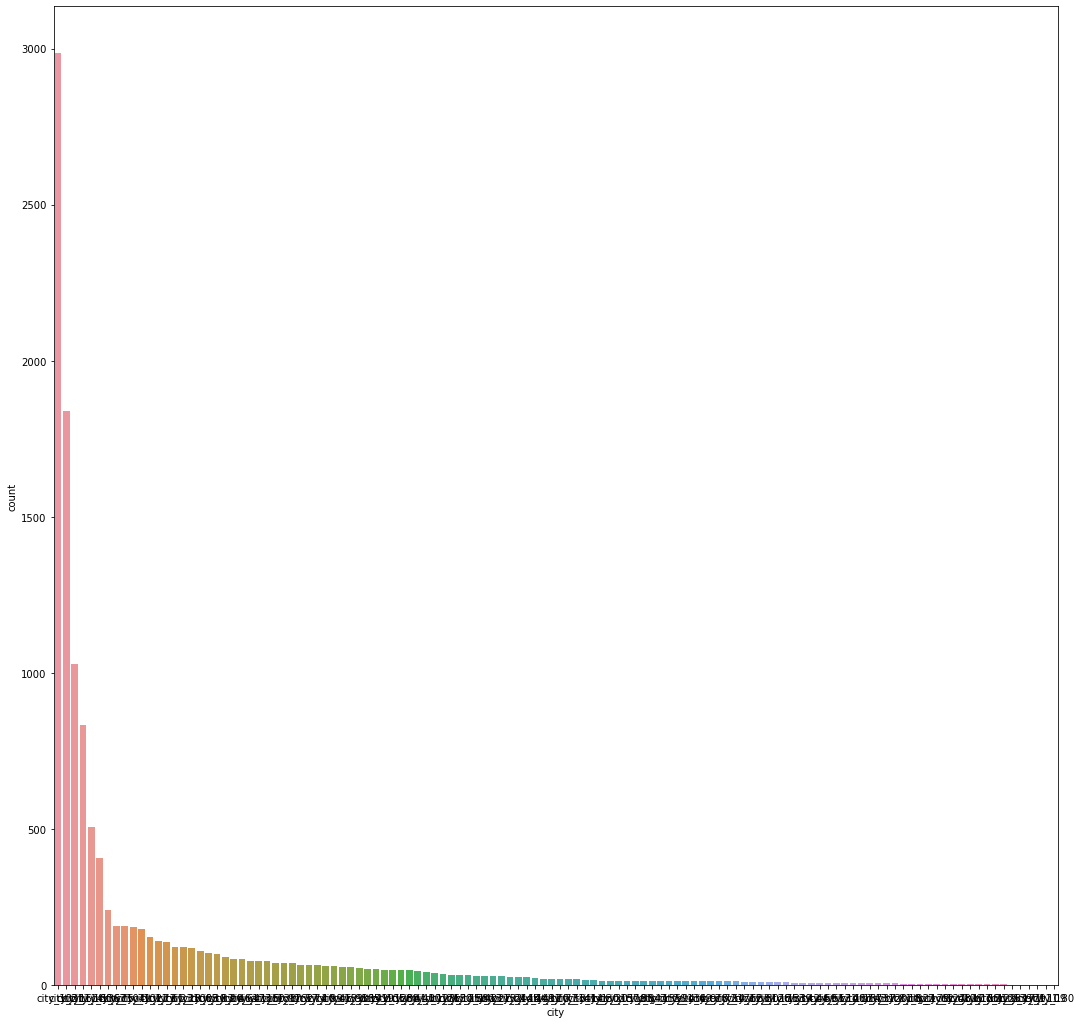

gender


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


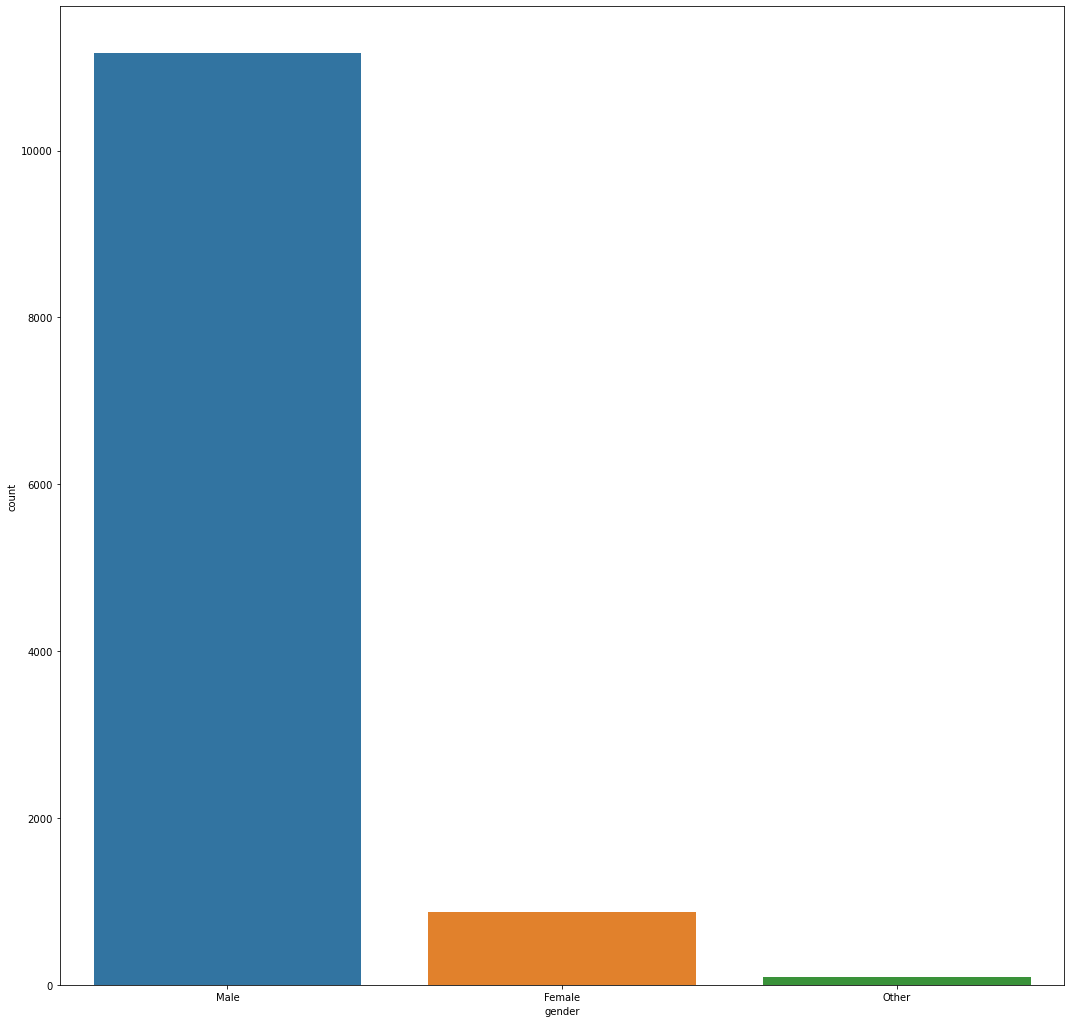

relevent_experience


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


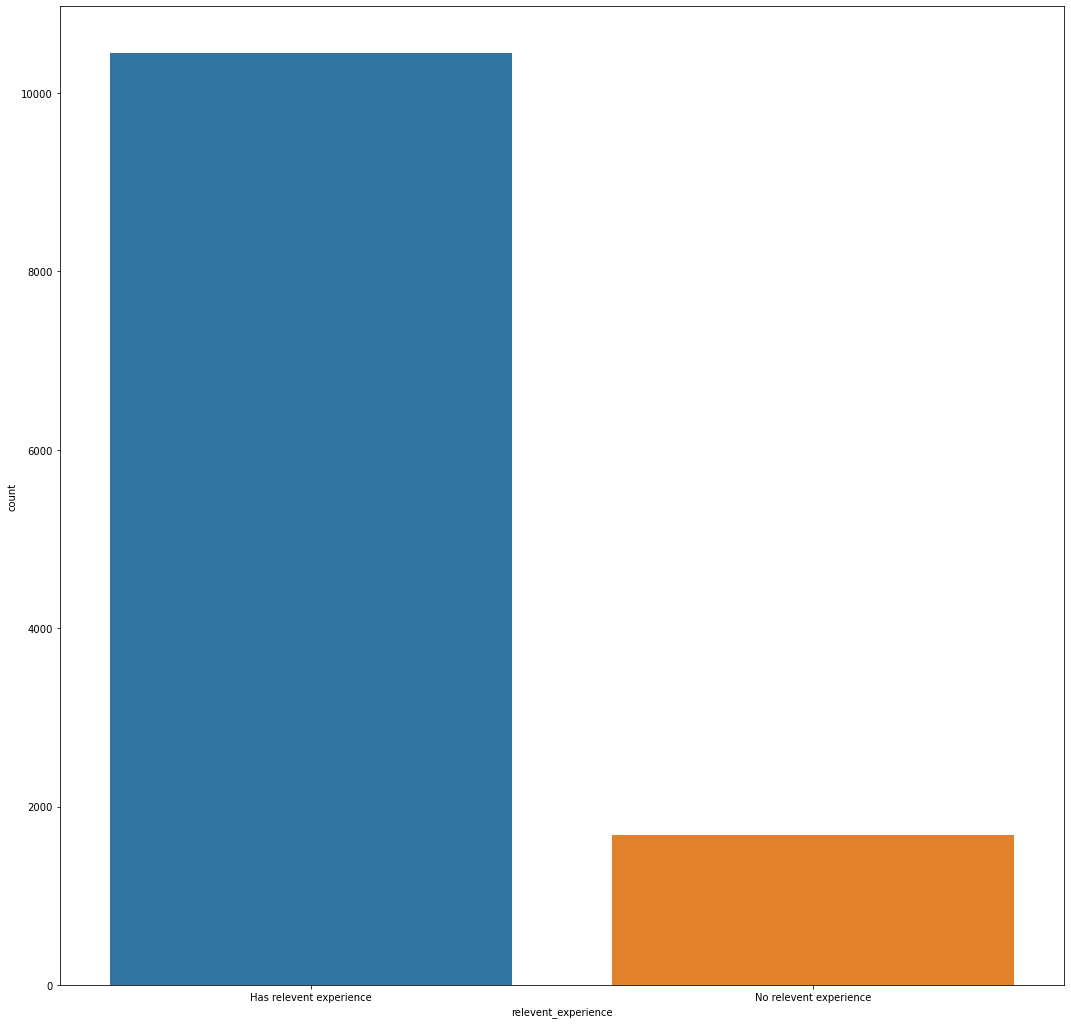

enrolled_university


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


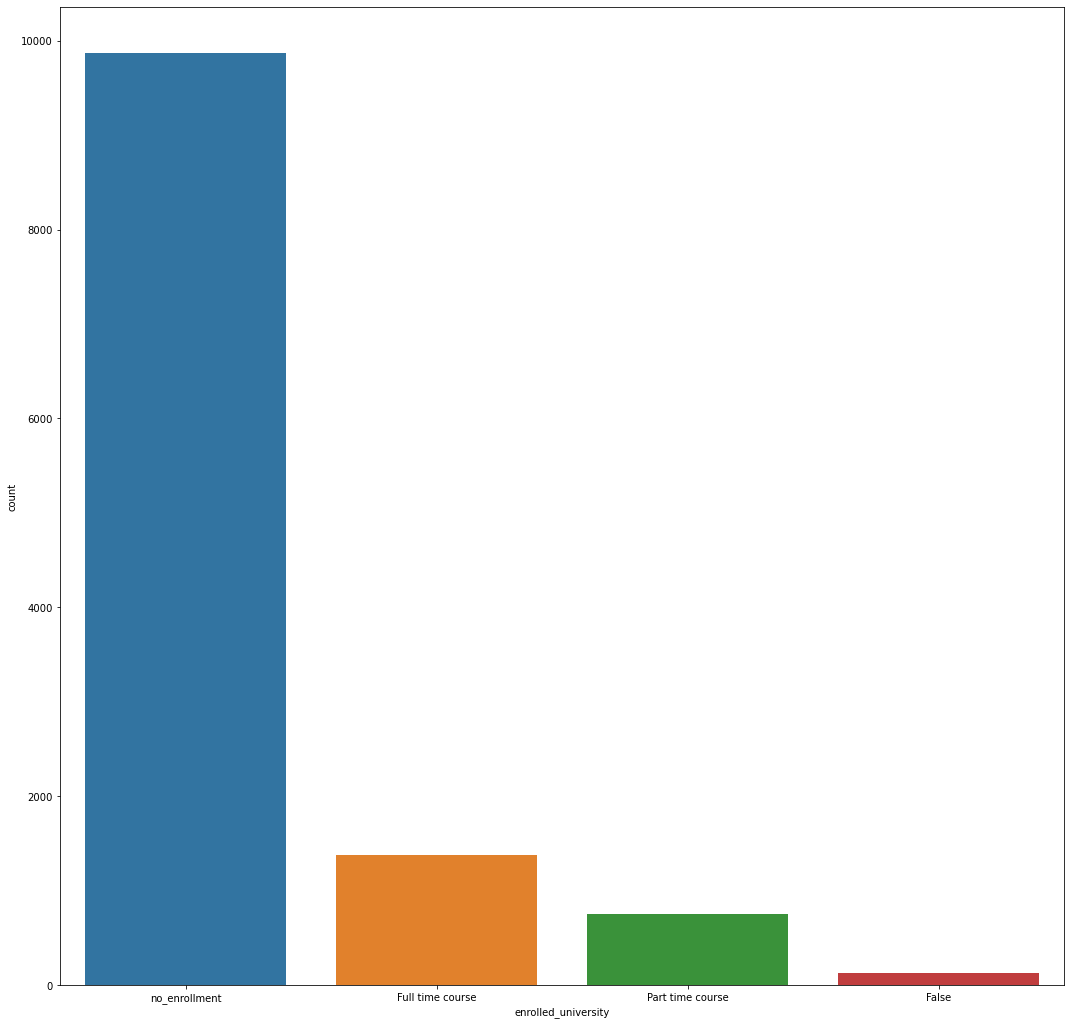

education_level


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


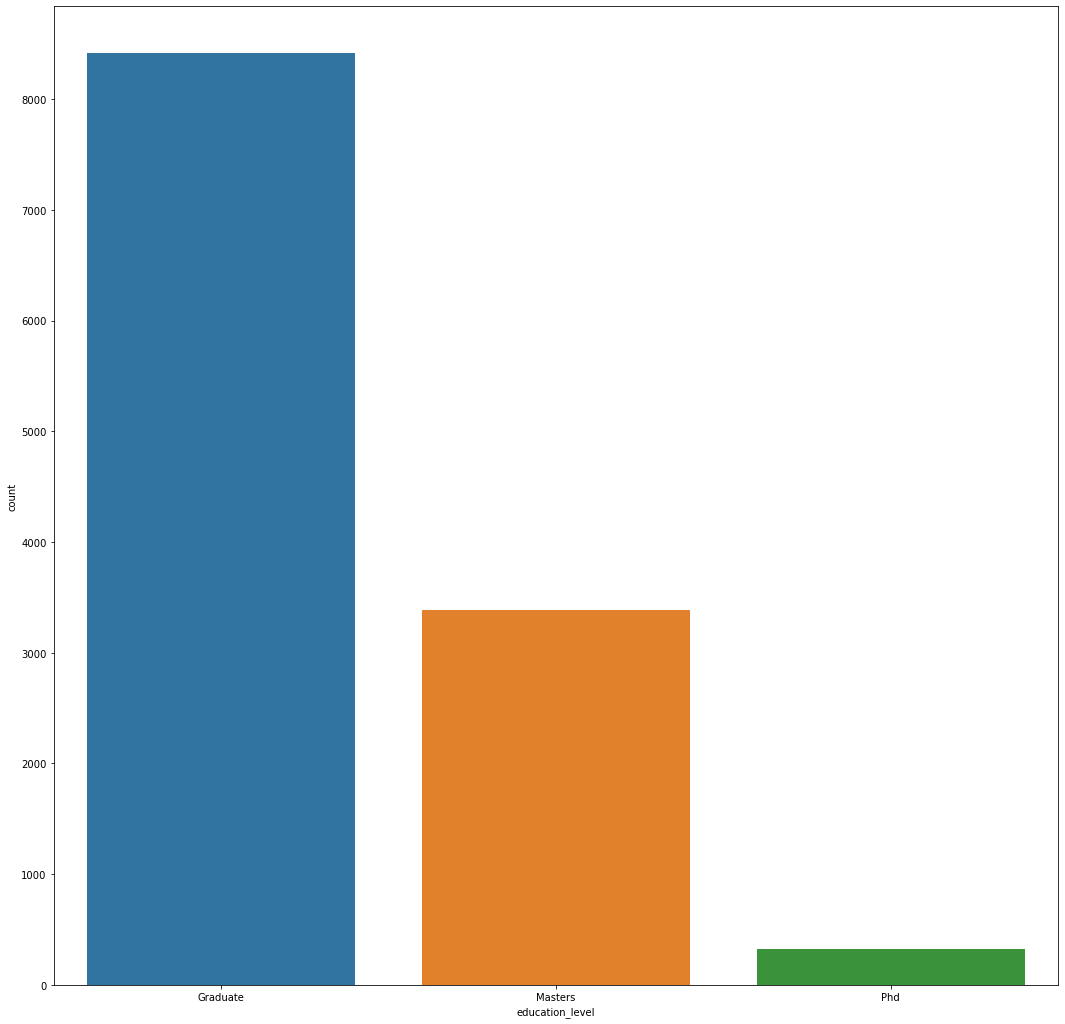

major_discipline


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


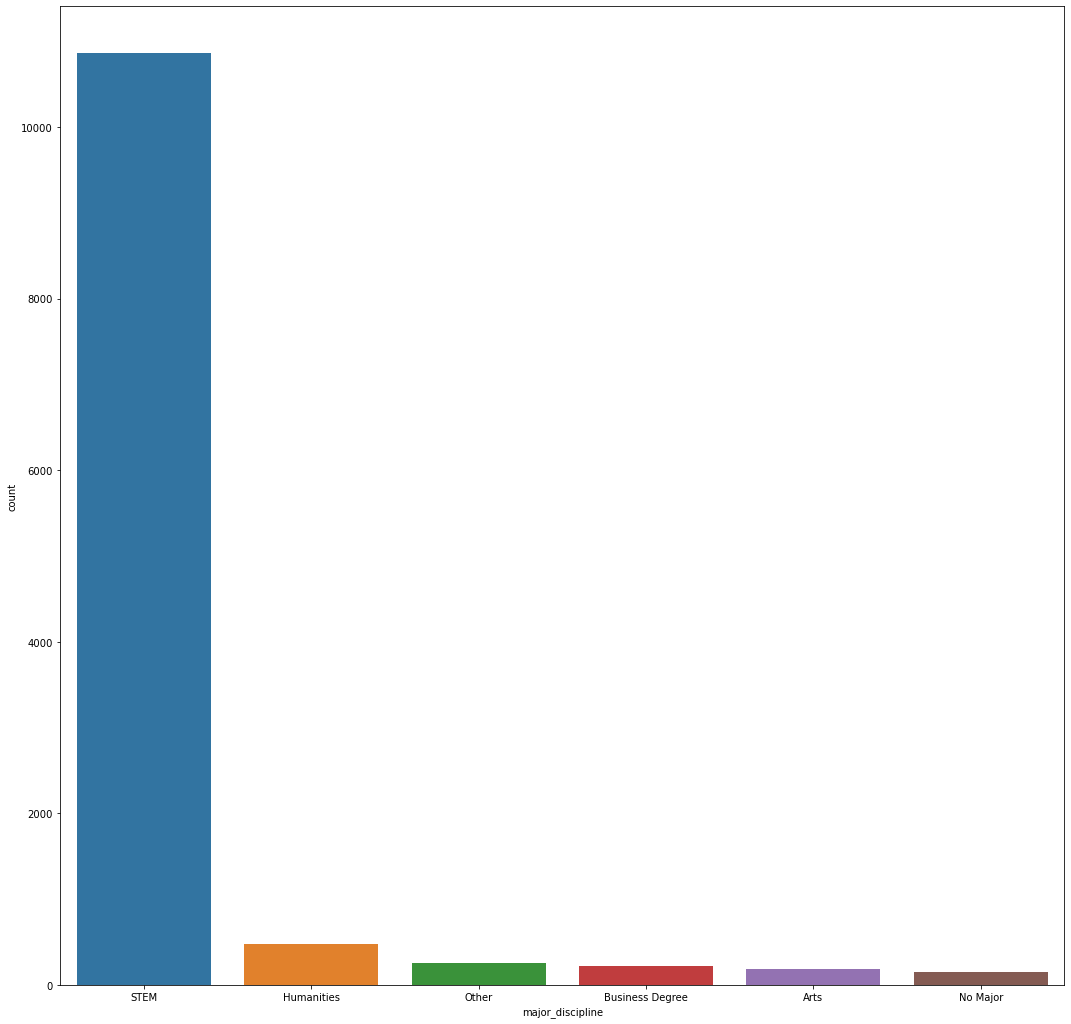

company_size


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


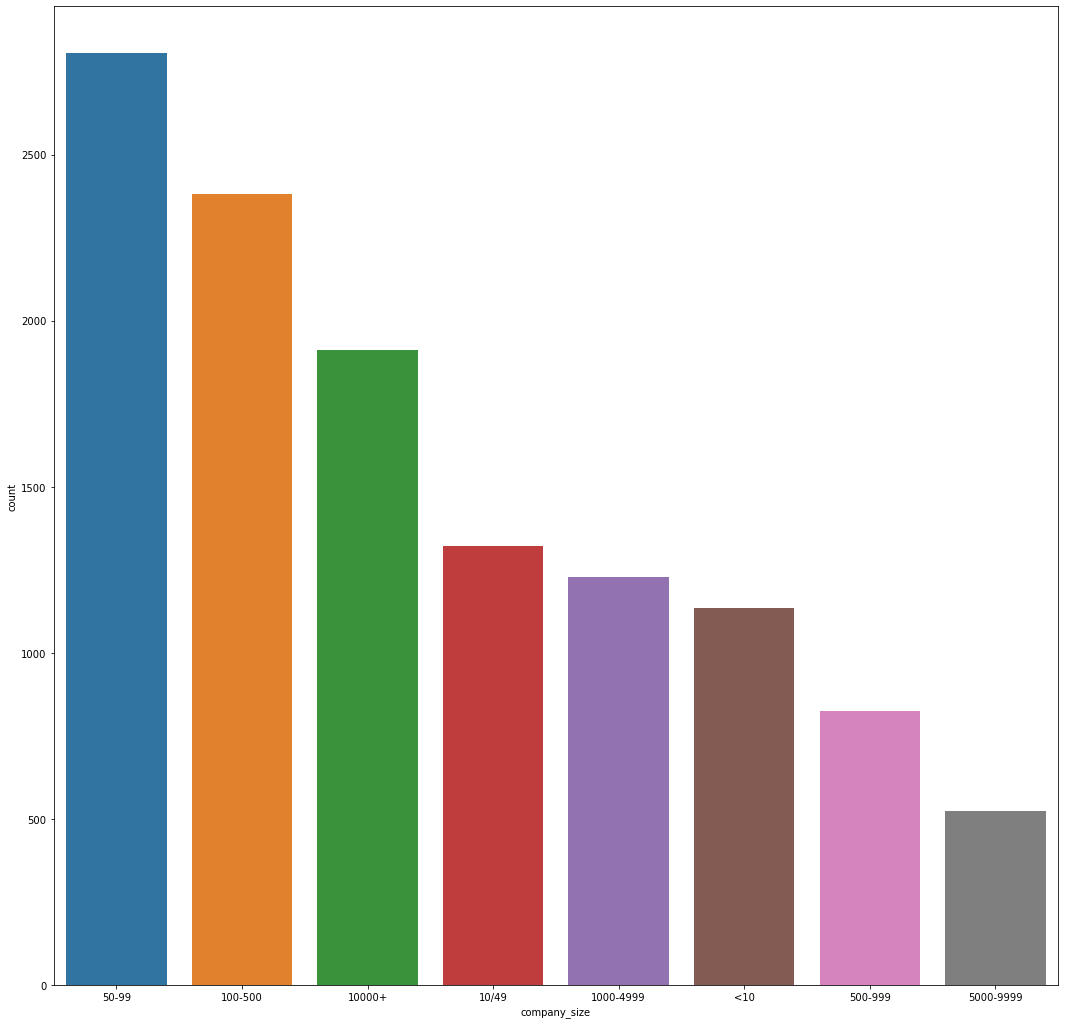

company_type


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


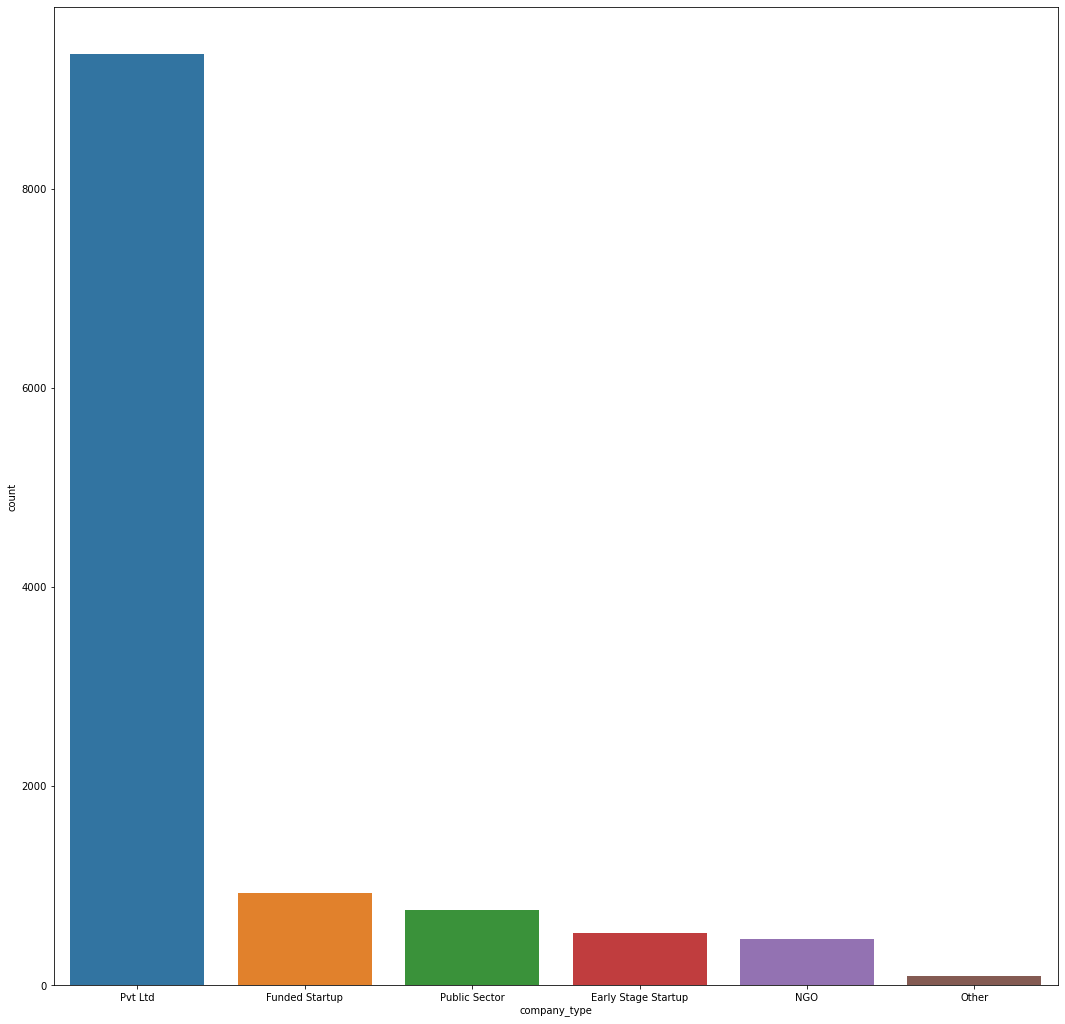

In [519]:
for col in data.select_dtypes(exclude = np.number).columns:
    print(col)
    plt.figure(figsize=(18,18))
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.show()

enrollee_id


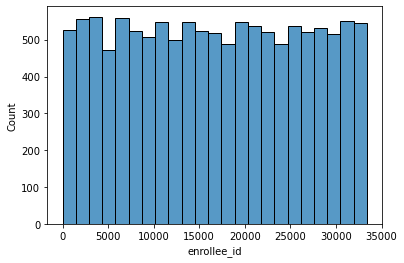

city_development_index


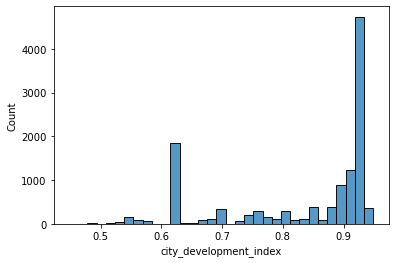

experience


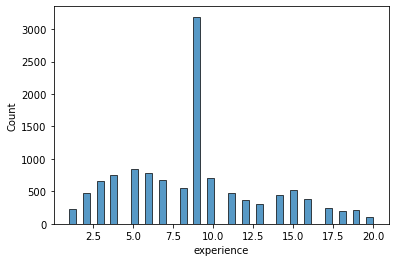

last_new_job


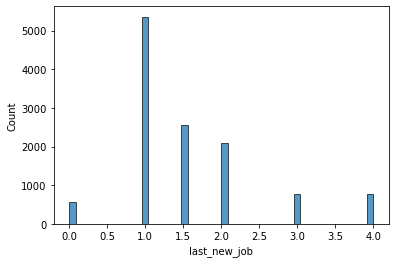

training_hours


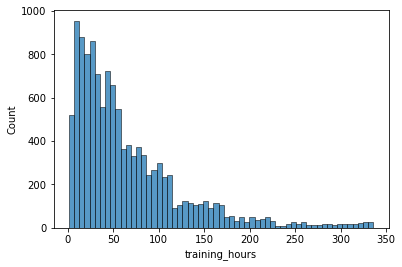

target


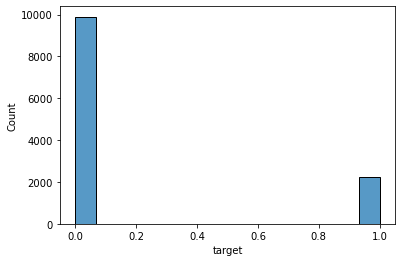

In [520]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.histplot(data[col])
    plt.show()